1:  443


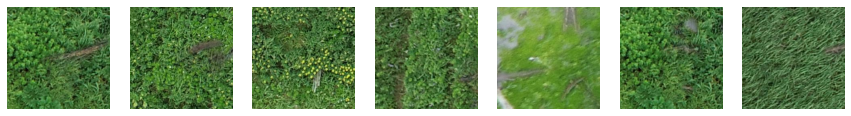

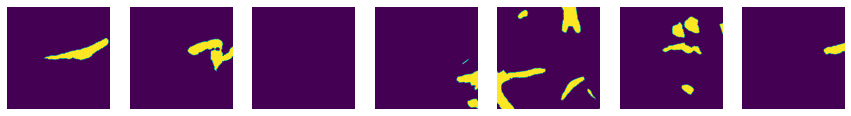

2:  2389


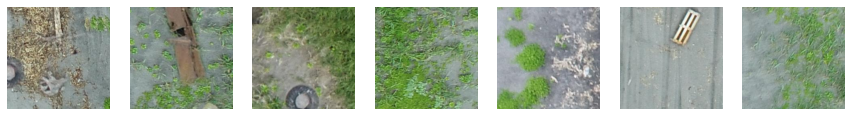

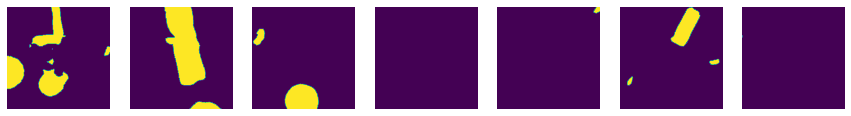

3:  92


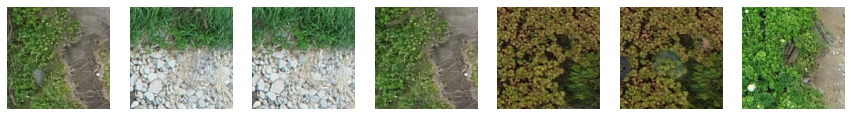

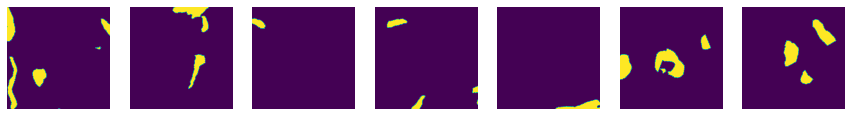

4:  270


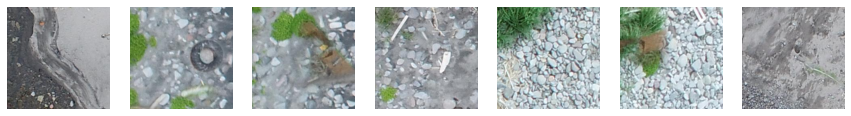

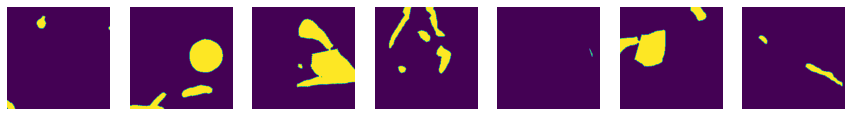

5:  1057


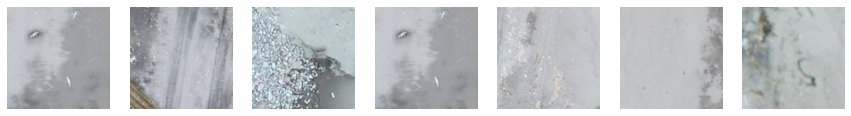

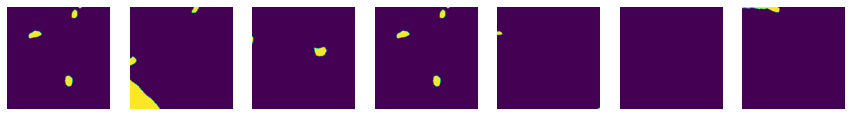

6:  509


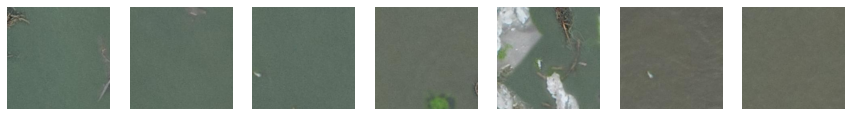

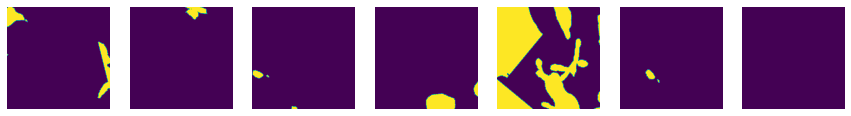

7:  6364


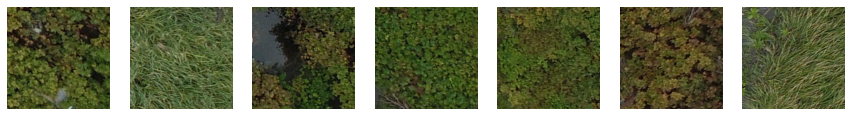

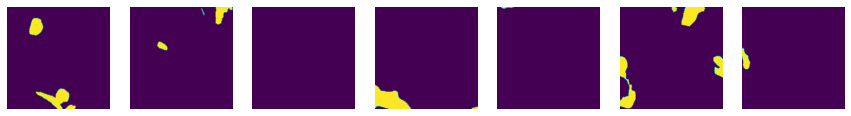

8:  3554


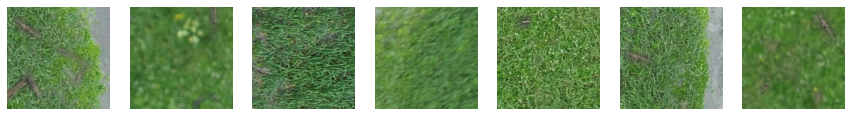

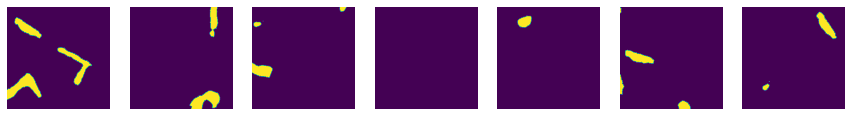

9:  7740


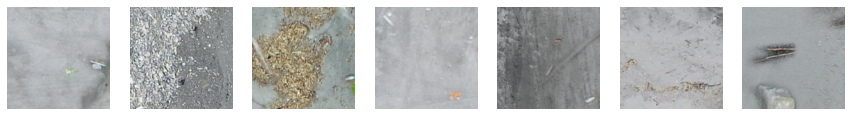

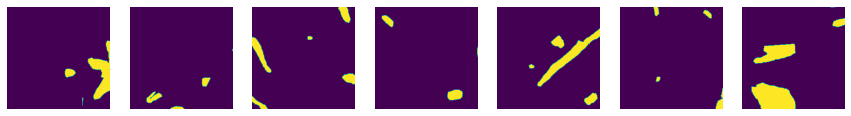

10:  7177


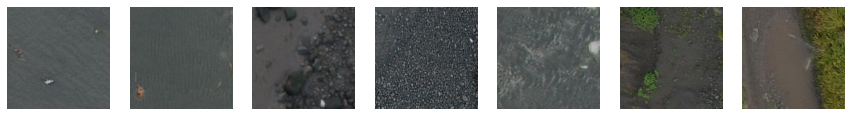

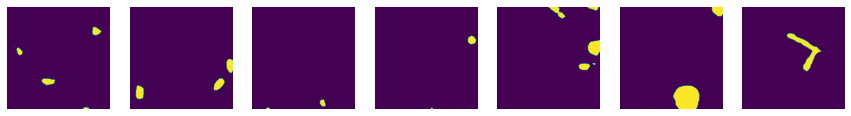

11:  9405


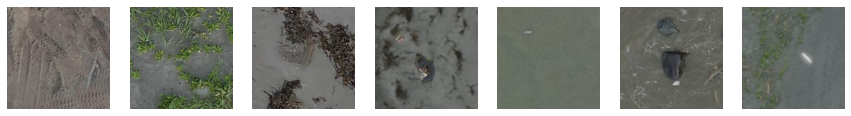

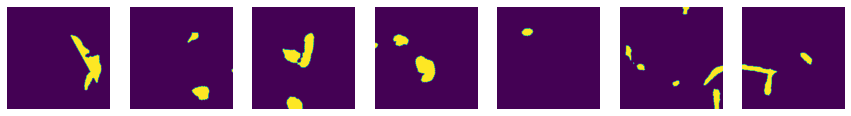

total:  39000


In [12]:
dataset_path = '/home/jupyter/datasphere/s3/garbage-data/stargan_datasets/generated_image_with_mask_dataset/'

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from generate_stargan_dataset import get_common_mask

ncols = 7

s = 0

class_pattern = 'class_00'
for i in range(1, 12):
    class_name = str(i)
    class_name = class_pattern[:-len(class_name)] + class_name
    
    class_path = os.path.join(dataset_path, class_name)
    list_dir = os.listdir(class_path)
    if len(list_dir) > 0:
        names = np.random.choice(list_dir, ncols)
        print(f'{i}: ', len(list_dir))
        s += len(list_dir)

        fig, axes = plt.subplots(ncols=ncols, figsize=(15, 2))
        fig_masks, axes_masks = plt.subplots(ncols=ncols, figsize=(15, 2))
        for i, name in enumerate(names):
            img_and_masks = np.load(os.path.join(class_path, name))
            img = img_and_masks[:, :, :3]
            mask = get_common_mask(img_and_masks[:, :, 3:])

            axes[i].imshow(img)
            axes[i].axis('off')
            
            axes_masks[i].imshow(mask)
            axes_masks[i].axis('off')

    plt.show()
    
print('total: ', s)

In [10]:
#!mkdir ../make_image_with_mask_dataset 

In [11]:
#!cp -r ./* ../make_image_with_mask_dataset/